In [39]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import math
import time
import functions

In [5]:
filepath ='data/'
with open(filepath+'rx_training.csv') as datafile:
    filecontents = csv.reader(datafile, delimiter = ",")
    data = list(filecontents)

rxdata = pd.DataFrame(data)
rxdata.columns = rxdata.iloc[0]
rxdata = rxdata[1:]

In [13]:
rxdata['DAYS_FROM_DIAG']=rxdata['DAYS_FROM_DIAG'].apply(pd.to_numeric) #convert days from diagnosis to numeric
rxdata.loc[rxdata['STD_COST']=='None', 'STD_COST']=0
rxdata['STD_COST']=rxdata['STD_COST'].apply(pd.to_numeric)

In [36]:
#Create 5-day bins and bin labels. I think this puts bin 0 at bin 0,5
print rxdata.DAYS_FROM_DIAG.max() #Find max days from diagnosis
print rxdata.DAYS_FROM_DIAG.min() #Find minimum days before diagnosis
min_day = rxdata.DAYS_FROM_DIAG.min()
max_day = rxdata.DAYS_FROM_DIAG.max()
#Compute the number of bins at some point, didn't automate this
rxdata['fivedaybin'] = pd.cut(rxdata['DAYS_FROM_DIAG'], range(-730, 1100, 5), right=False) #bin by 5 days rounding on the outside to nice numbers
r5=range(-730,1100+5,5) #define bin edges
binlabel5=range(-147,219) #number of negative bins, number of positive bins. Remembering how range works means it should put bin 0 in the correct spot
#categories = pd.cut(rxdata['DAYS_FROM_DIAG'], r, labels=binlabel) #run this if you want to see the bin labels
#print categories
rxdata['fivedaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r5, labels=binlabel5)
#print rxdata.head(n=3)

1095
-727


In [8]:
#Create 7-day bins and bin labels.
rxdata['sevendaybin']=pd.cut(rxdata['DAYS_FROM_DIAG'],range(-728,1099,7),right=False) #create the bins
numbins = (728+1099)/7 #automate endpoint search? Probably not worth it
numneg = -728/7
numpos=1099/7
print numneg
print numpos
r7=range(-728,1099+7,7)
binlabel7=range(numneg,numpos)
rxdata['sevendaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r7, labels=binlabel7)
#print rxdata.head(n=3)

-104
157


In [9]:
#Create 10-day bins and bin labels.
rxdata['tendaybin']=pd.cut(rxdata['DAYS_FROM_DIAG'],range(-730,1100,10),right=False) #create the bins
numbins = (730+1100)/10 #automate endpoint search? Probably not worth it
numneg = -730/10
numpos=1100/10
print numneg
print numpos
r10=range(-730,1100+10,10)
binlabel10=range(numneg,numpos)
rxdata['tendaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r10, labels=binlabel10)
#print rxdata.head(n=3)

-73
110


In [10]:
#Create 20-day bins and bin labels.
rxdata['twentydaybin']=pd.cut(rxdata['DAYS_FROM_DIAG'],range(-740,1100,20),right=False) #create the bins
numbins = (740+1100)/20 #automate endpoint search? Probably not worth it
numneg = -740/20
numpos=1100/20
print numneg
print numpos
r20=range(-740,1100+20,20)
binlabel20=range(numneg,numpos)
rxdata['twentydaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r20, labels=binlabel20)
print rxdata.head(n=3)

-37
55
0          PATID       CLMID  AHFSCLSS DAYS_SUP QUANTITY STD_COST  \
1  33051763235.0  1601702440  08140800        2    2.000     1.42   
2  33051763235.0  1601702325  08309200        7   14.000     6.06   
3  33051763235.0  1470992483  12200400       30   90.000     7.54   

0  DAYS_FROM_DIAG    fivedaybin fivedaybin_id   sevendaybin sevendaybin_id  \
1            -115  [-115, -110)           -25  [-119, -112)            -17   
2            -115  [-115, -110)           -25  [-119, -112)            -17   
3            -169  [-170, -165)           -35  [-175, -168)            -25   

0     tendaybin tendaybin_id  twentydaybin twentydaybin_id  
1  [-120, -110)          -12  [-120, -100)              -6  
2  [-120, -110)          -12  [-120, -100)              -6  
3  [-170, -160)          -17  [-180, -160)              -9  


In [42]:
#Create 30-day bins and bin labels.
binsize = 30
numbins = int(math.ceil(-min_day/binsize) + math.ceil(max_day/binsize)) #automate endpoint search? Probably not worth it
numneg = int(math.ceil(min_day/binsize))
numpos = int(math.ceil(max_day/binsize))
print numneg
print numpos
r30=range(numneg*binsize,(numpos+1)*binsize,binsize)
binlabel30=range(numneg,numpos)
rxdata['thirtydaybin']=pd.cut(rxdata['DAYS_FROM_DIAG'],r30,right=False) #create the bins
rxdata['thirtydaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r30, labels=binlabel30)
print rxdata.head(n=3)

-25
36
0          PATID       CLMID  AHFSCLSS DAYS_SUP QUANTITY  STD_COST  \
1  33051763235.0  1601702440  08140800        2    2.000      1.42   
2  33051763235.0  1601702325  08309200        7   14.000      6.06   
3  33051763235.0  1470992483  12200400       30   90.000      7.54   

0  DAYS_FROM_DIAG    fivedaybin fivedaybin_id   sevendaybin sevendaybin_id  \
1            -115  [-115, -110)           -25  [-119, -112)            -17   
2            -115  [-115, -110)           -25  [-119, -112)            -17   
3            -169  [-170, -165)           -35  [-175, -168)            -25   

0     tendaybin tendaybin_id  twentydaybin twentydaybin_id  thirtydaybin  \
1  [-120, -110)          -12  [-120, -100)              -6   [-120, -90)   
2  [-120, -110)          -12  [-120, -100)              -6   [-120, -90)   
3  [-170, -160)          -17  [-180, -160)              -9  [-180, -150)   

0 thirtydaybin_id  
1              -4  
2              -4  
3              -6  


In [43]:
#Create 60-day bins and bin labels.
binsize = 60
numbins = int(math.ceil(-min_day/binsize) + math.ceil(max_day/binsize)) #automate endpoint search? Probably not worth it
numneg = int(math.ceil(min_day/binsize))
numpos = int(math.ceil(max_day/binsize))
print numneg
print numpos
r30=range(numneg*binsize,(numpos+1)*binsize,binsize)
binlabel30=range(numneg,numpos)
rxdata['sixtydaybin']=pd.cut(rxdata['DAYS_FROM_DIAG'],r30,right=False) #create the bins
rxdata['sixtydaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r30, labels=binlabel30)
print rxdata.head(n=3)

-13
18
0          PATID       CLMID  AHFSCLSS DAYS_SUP QUANTITY  STD_COST  \
1  33051763235.0  1601702440  08140800        2    2.000      1.42   
2  33051763235.0  1601702325  08309200        7   14.000      6.06   
3  33051763235.0  1470992483  12200400       30   90.000      7.54   

0  DAYS_FROM_DIAG    fivedaybin fivedaybin_id   sevendaybin sevendaybin_id  \
1            -115  [-115, -110)           -25  [-119, -112)            -17   
2            -115  [-115, -110)           -25  [-119, -112)            -17   
3            -169  [-170, -165)           -35  [-175, -168)            -25   

0     tendaybin tendaybin_id  twentydaybin twentydaybin_id  thirtydaybin  \
1  [-120, -110)          -12  [-120, -100)              -6   [-120, -90)   
2  [-120, -110)          -12  [-120, -100)              -6   [-120, -90)   
3  [-170, -160)          -17  [-180, -160)              -9  [-180, -150)   

0 thirtydaybin_id   sixtydaybin sixtydaybin_id  
1              -4   [-120, -60)             -

In [44]:
#Create 120-day bins and bin labels.
binsize = 120
numbins = int(math.ceil(-min_day/binsize) + math.ceil(max_day/binsize)) #automate endpoint search? Probably not worth it
numneg = int(math.ceil(min_day/binsize))
numpos = int(math.ceil(max_day/binsize))
print numneg
print numpos
r30=range(numneg*binsize,(numpos+1)*binsize,binsize)
binlabel30=range(numneg,numpos)
rxdata['onetwentydaybin']=pd.cut(rxdata['DAYS_FROM_DIAG'],r30,right=False) #create the bins
rxdata['onetwentydaybin_id'] = pd.cut(rxdata['DAYS_FROM_DIAG'], r30, labels=binlabel30)
print rxdata.head(n=3)

-7
9
0          PATID       CLMID  AHFSCLSS DAYS_SUP QUANTITY  STD_COST  \
1  33051763235.0  1601702440  08140800        2    2.000      1.42   
2  33051763235.0  1601702325  08309200        7   14.000      6.06   
3  33051763235.0  1470992483  12200400       30   90.000      7.54   

0  DAYS_FROM_DIAG    fivedaybin fivedaybin_id   sevendaybin  \
1            -115  [-115, -110)           -25  [-119, -112)   
2            -115  [-115, -110)           -25  [-119, -112)   
3            -169  [-170, -165)           -35  [-175, -168)   

0        ...             tendaybin tendaybin_id  twentydaybin twentydaybin_id  \
1        ...          [-120, -110)          -12  [-120, -100)              -6   
2        ...          [-120, -110)          -12  [-120, -100)              -6   
3        ...          [-170, -160)          -17  [-180, -160)              -9   

0  thirtydaybin thirtydaybin_id   sixtydaybin sixtydaybin_id onetwentydaybin  \
1   [-120, -90)              -4   [-120, -60)           

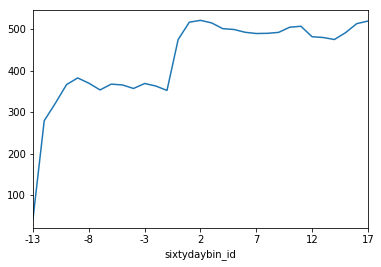

In [48]:
temp = rxdata.groupby(['PATID', 'sixtydaybin_id'])['STD_COST'].sum().reset_index(name='bin_cost')

temp.groupby(['sixtydaybin_id'])['bin_cost'].mean().plot()
plt.show()